<a href="https://colab.research.google.com/github/analyticalaq/KPMG/blob/main/kpmg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile("/content/KPMG_VI_New_raw_data_update_final - Copy.xlsx")

# List the sheet names
sheet_names = xls.sheet_names
sheet_names


['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

In [ ]:
# Load the Transactions sheet and display the first few rows
transactions_df = pd.read_excel(xls, 'Transactions')
transactions_df.head()


,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [ ]:
# Reload the Transactions sheet considering the correct header row
transactions_df = pd.read_excel(xls, 'Transactions', skiprows=1)
transactions_df.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
# Check for missing values in the Transactions sheet
transactions_missing_values = transactions_df.isnull().sum()
transactions_missing_values


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [ ]:
# Check for duplicate rows in the Transactions sheet
transactions_duplicates = transactions_df.duplicated().sum()
transactions_duplicates


0

In [ ]:
# Check the data types for each column in the Transactions sheet
transactions_data_types = transactions_df.dtypes
transactions_data_types


transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [ ]:
# Investigate unique values in the online_order and product_first_sold_date columns
online_order_unique_values = transactions_df['online_order'].unique()
product_first_sold_date_unique_values = transactions_df['product_first_sold_date'].unique()

online_order_unique_values, product_first_sold_date_unique_values[:10]  # Display the first 10 unique values for product_first_sold_date


(array([ 0.,  1., nan]),
 array([41245., 41701., 36361., 36145., 42226., 39031., 34165., 39915.,
        33455., 38216.]))

In [ ]:
# Load the NewCustomerList sheet and display the first few rows
new_customer_list_df = pd.read_excel(xls, 'NewCustomerList', skiprows=1)
new_customer_list_df.head()


<ipython-input-8-dfb9d2e4e0dd>:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_customer_list_df = pd.read_excel(xls, 'NewCustomerList', skiprows=1)


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.93,1.1625,1.453125,1.235156,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.88,0.8800,1.100000,0.935000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.97,0.9700,0.970000,0.970000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.45,0.5625,0.562500,0.562500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.98,0.9800,1.225000,1.225000,4,4,1.703125


In [ ]:
# Check for missing values in the NewCustomerList sheet
new_customer_list_missing_values = new_customer_list_df.isnull().sum()
new_customer_list_missing_values


first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [ ]:
# Check for duplicate rows in the NewCustomerList sheet
new_customer_list_duplicates = new_customer_list_df.duplicated().sum()
new_customer_list_duplicates


0

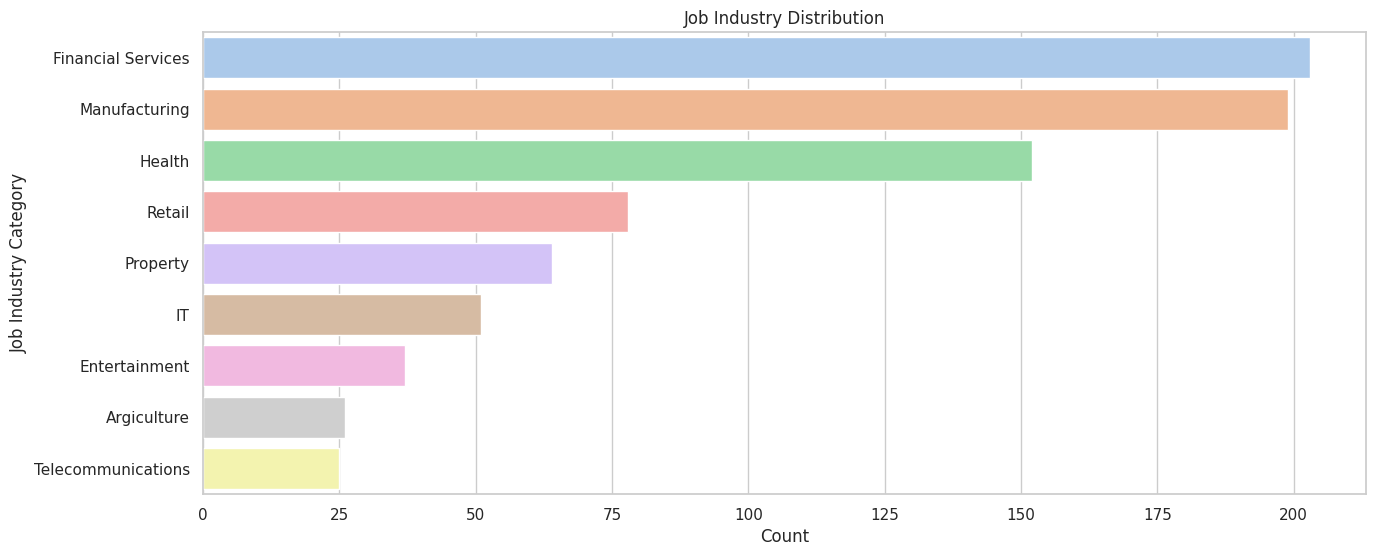

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Create a figure with a single subplot
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# Plot Job Industry Distribution
sns.countplot(data=new_customer_list_df, y='job_industry_category', ax=ax, palette='pastel', order=new_customer_list_df['job_industry_category'].value_counts().index)
ax.set_title('Job Industry Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Job Industry Category')

# Display the plot
plt.show()


Text(0, 0.5, 'Count')

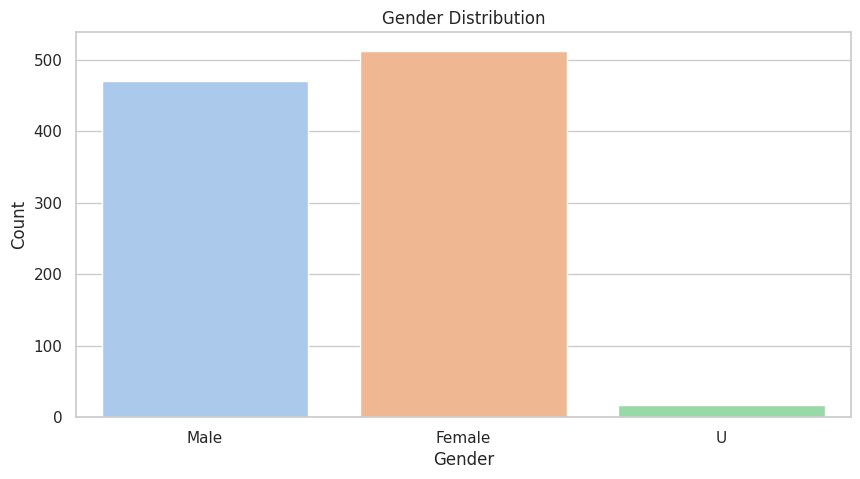

In [ ]:
# Set up the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Create a figure with multiple subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Plot Gender Distribution
sns.countplot(data=new_customer_list_df, x='gender', ax=ax, palette='pastel')
ax.set_title('Gender Distribution')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')


Text(0, 0.5, 'Count')

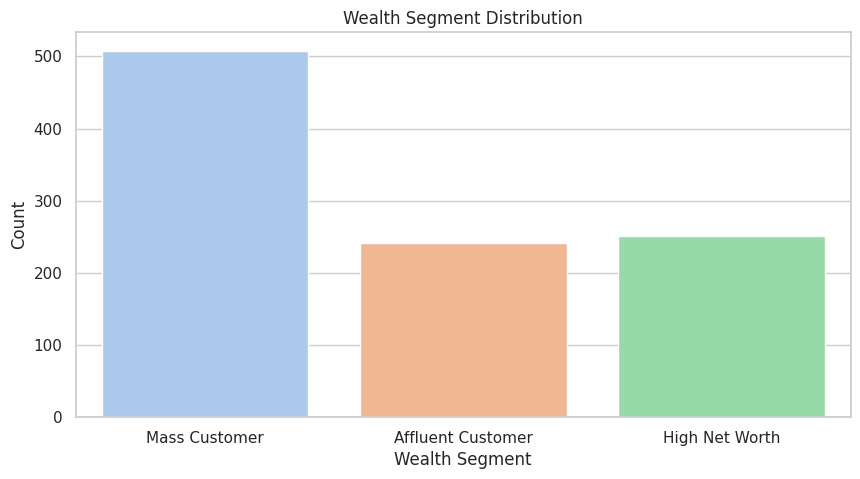

In [ ]:
# Set up the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Create a figure with multiple subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
# Plot Wealth Segment Distribution
sns.countplot(data=new_customer_list_df, x='wealth_segment', ax=ax, palette='pastel')
ax.set_title('Wealth Segment Distribution')
ax.set_xlabel('Wealth Segment')
ax.set_ylabel('Count')




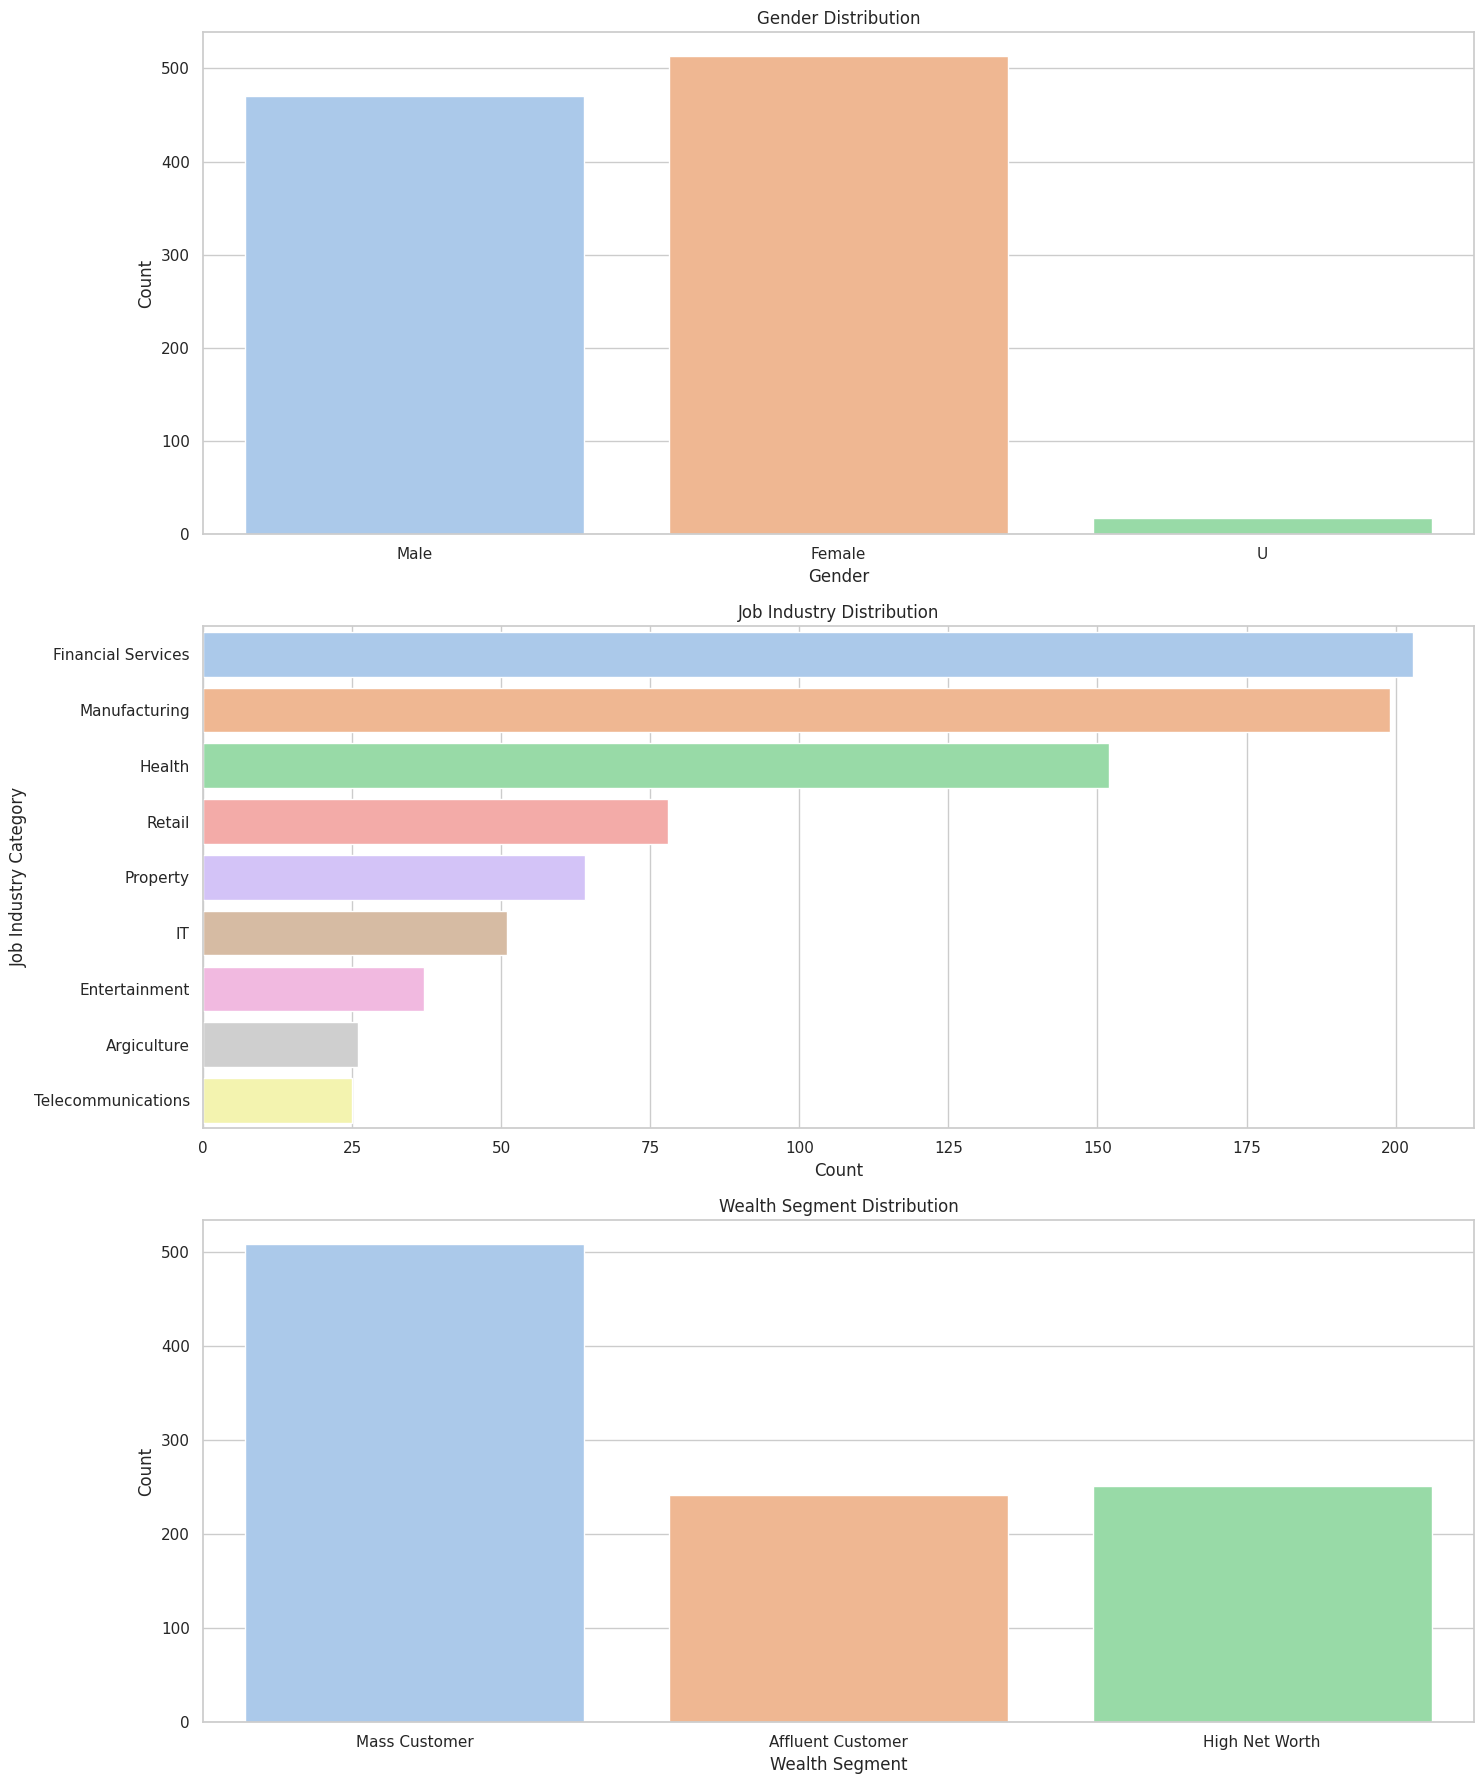

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the aesthetics for the plots
sns.set_theme(style="whitegrid")

# Create a figure with multiple subplots
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 18))

# Plot Gender Distribution
sns.countplot(data=new_customer_list_df, x='gender', ax=ax[0], palette='pastel')
ax[0].set_title('Gender Distribution')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

# Plot Job Industry Distribution
sns.countplot(data=new_customer_list_df, y='job_industry_category', ax=ax[1], palette='pastel', order=new_customer_list_df['job_industry_category'].value_counts().index)
ax[1].set_title('Job Industry Distribution')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Job Industry Category')

# Plot Wealth Segment Distribution
sns.countplot(data=new_customer_list_df, x='wealth_segment', ax=ax[2], palette='pastel')
ax[2].set_title('Wealth Segment Distribution')
ax[2].set_xlabel('Wealth Segment')
ax[2].set_ylabel('Count')

# Adjust the layout
plt.tight_layout()
plt.show()


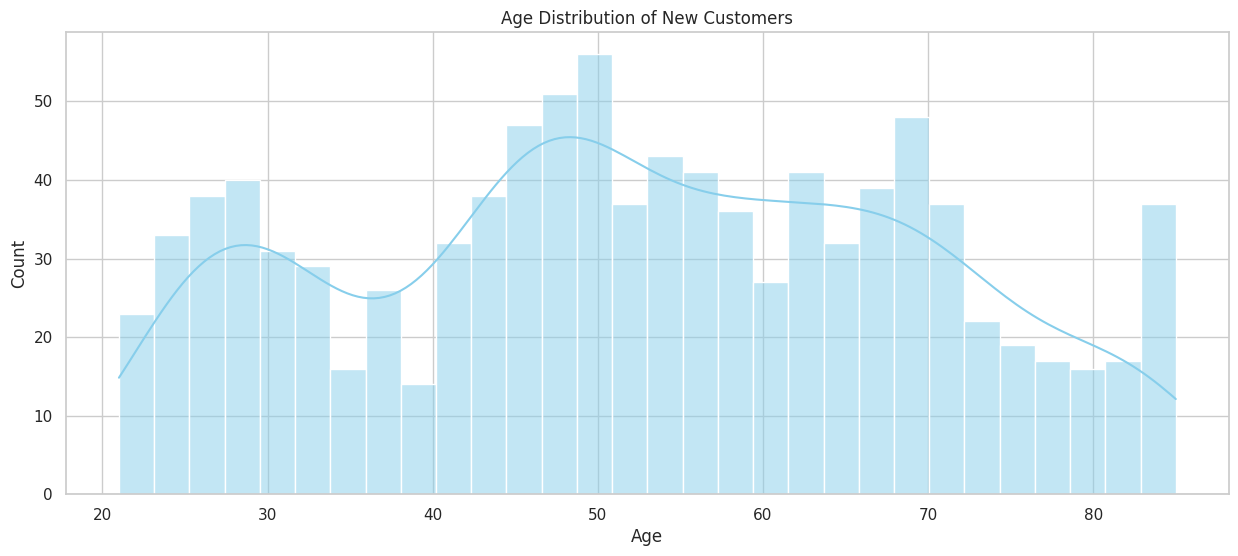

In [ ]:
# Calculate age from DOB
current_year = pd.Timestamp.now().year
new_customer_list_df['age'] = current_year - new_customer_list_df['DOB'].dt.year

# Plot Age Distribution
plt.figure(figsize=(15, 6))
sns.histplot(new_customer_list_df['age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of New Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


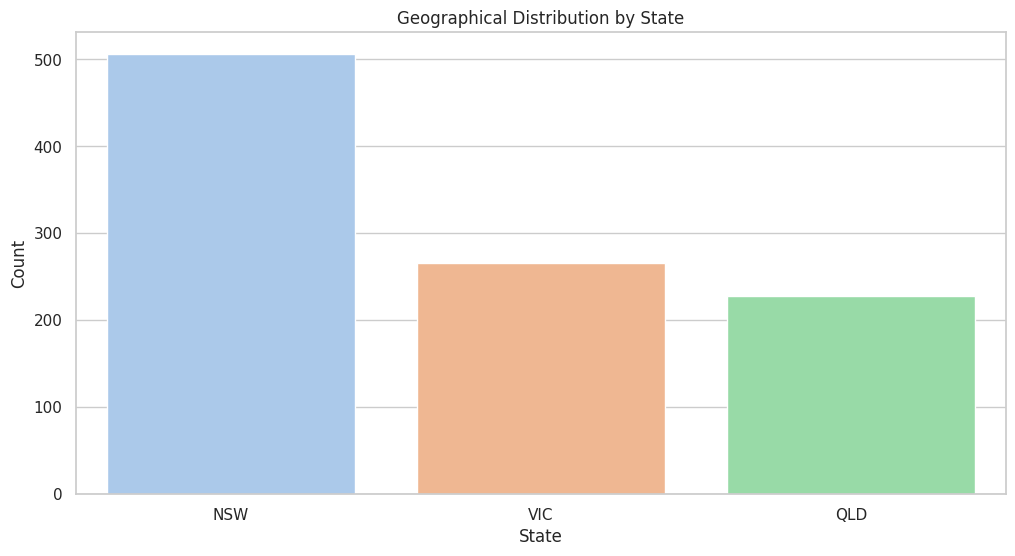

In [ ]:
# Plot Geographical Distribution by State
plt.figure(figsize=(12, 6))
sns.countplot(data=new_customer_list_df, x='state', palette='pastel', order=new_customer_list_df['state'].value_counts().index)
plt.title('Geographical Distribution by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()
